# Project 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### Fetch data

In [3]:
data = pd.read_csv('../raw_data/survey_results_public.csv')
schema = pd.read_csv('../raw_data/survey_results_schema.csv')

### Q1: What programming languanges do the happy programmers use the most?
happy programmers: okay with the job and career, with 6 and above 

label: 'HaveWorkedLanguage', WantWorkLanguage

    features: Country, University, CompanySize, WebDeveloperType, MobileDeveloperType, ProblemSolving, BuildingThings, LearningNewTech, BoringDetails, JobSecurity, HoursPerWeek, EducationImportant



#### Clean data

In [50]:
happy_programmer_df = data.loc[(data['JobSatisfaction']>=8) & data['CareerSatisfaction'] == True].copy() # filter the people who like the current jobs

#### Exploratory data analysis

In [6]:
# generate country distribution for happy prorammers
happy_programmer_country_df = happy_programmer_df.groupby(['Country'])['JobSatisfaction'].count().to_frame('Count').reset_index()
happy_programmer_country_df.sort_values(by = 'Count', ascending=False, inplace =True)

In [7]:
happy_programmer_country_df.describe()

,Count
count,147.000000
mean,127.108844
std,455.579010
min,1.000000
25%,5.000000
50%,18.000000
75%,89.500000
max,4813.000000


In [8]:
# filter the results with the count above the mean of the data
happy_programmer_country_df_reduced =  happy_programmer_country_df[happy_programmer_country_df['Count'] >= happy_programmer_country_df['Count'].mean()]

In [9]:
# top 5 countries
happy_programmer_country_top5 = happy_programmer_country_df_reduced.iloc[0:5,:].copy()
# precentage caculations:
top5_precentage = happy_programmer_country_top5['Count'].sum()/happy_programmer_country_df['Count'].sum()*100
print(f"The top five countries accounts {top5_precentage}% of the total programmers all around the world. And they are {list(happy_programmer_country_top5['Country'])}")

The top five countries accounts 54.5036125234145% of the total programmers all around the world. And they are ['United States', 'United Kingdom', 'Germany', 'India', 'Canada']


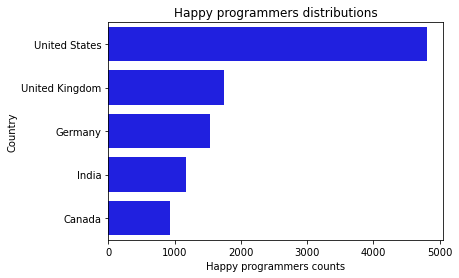

In [10]:
sns.barplot(x=happy_programmer_country_top5['Count'], y=happy_programmer_country_top5['Country'], color='b')
plt.xlabel('Happy programmers counts')
plt.title('Happy programmers distributions');

In [11]:
# explode the languages
happy_programmer_df['Language']  = happy_programmer_df['HaveWorkedLanguage'].apply(lambda x: str(x).replace(" ", "").split(";")).copy()
happy_programmer_language_df = happy_programmer_df.explode('Language')


<ipython-input-11-46e2fc58ef2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_programmer_df['Language']  = happy_programmer_df['HaveWorkedLanguage'].apply(lambda x: str(x).replace(" ", "").split(";")).copy()


In [12]:
# drop nan
happy_programmer_language_df = happy_programmer_language_df[happy_programmer_language_df['Language'] != "nan"]

In [13]:
# programming langues counts among the world
happy_programmer_language_count =happy_programmer_language_df.groupby(['Respondent','Language'])['DeveloperType'].count().to_frame('Count').reset_index()
happy_programmer_language_count = happy_programmer_language_count.groupby('Language')['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_count.sort_values(by = 'Count', ascending=False, inplace =True )

In [14]:
# top 5 langues among the world
happy_programmer_language_top5 = happy_programmer_language_count.iloc[0:5,:].copy()
# precentage caculations:
top5_language_precentage = happy_programmer_language_top5['Count'].sum()/happy_programmer_language_count['Count'].sum()*100
print(f"The top five programming languages in the world are {list(happy_programmer_language_top5['Language'])} and accounts {top5_language_precentage}% ")

The top five programming languages in the world are ['JavaScript', 'SQL', 'Java', 'C#', 'Python'] and accounts 58.254607546539475% 


In [15]:
# language in United States
happy_programmer_language_usa = happy_programmer_language_df[happy_programmer_language_df['Country'] == 'United States']
happy_programmer_language_usa_count =happy_programmer_language_usa.groupby(['Language'])['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_usa_count.sort_values(by = 'Count', ascending=False, inplace =True )
happy_programmer_language_usa_count
# top 5 langues
happy_programmer_language_usa_top5 = happy_programmer_language_usa_count.iloc[0:5,:].copy()
# precentage caculations:
top5_language_usa_precentage = happy_programmer_language_usa_top5['Count'].sum()/happy_programmer_language_usa_count['Count'].sum()*100
print(f"The top five programming languages in USA are {list(happy_programmer_language_usa_top5['Language'])} and accounts {top5_language_usa_precentage}% ")

The top five programming languages in USA are ['JavaScript', 'SQL', 'C#', 'Python', 'Java'] and accounts 58.13770491803278% 


In [16]:
# language in United Kingdom
happy_programmer_language_uk = happy_programmer_language_df[happy_programmer_language_df['Country'] == 'United Kingdom']
happy_programmer_language_uk_count =happy_programmer_language_uk.groupby(['Language'])['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_uk_count.sort_values(by = 'Count', ascending=False, inplace =True )
happy_programmer_language_uk_count
# top 5 langues
happy_programmer_language_uk_top5 = happy_programmer_language_uk_count.iloc[0:5,:].copy()
# precentage caculations:
top5_language_uk_precentage = happy_programmer_language_uk_top5['Count'].sum()/happy_programmer_language_uk_count['Count'].sum()*100
print(f"The top five programming languages in United Kingdom are {list(happy_programmer_language_uk_top5['Language'])} and accounts {top5_language_uk_precentage}% ")

The top five programming languages in United Kingdom are ['JavaScript', 'SQL', 'C#', 'PHP', 'Python'] and accounts 60.486784559802246% 


In [17]:
# language in Germany
happy_programmer_language_gm = happy_programmer_language_df[happy_programmer_language_df['Country'] == 'Germany']
happy_programmer_language_gm_count =happy_programmer_language_gm.groupby(['Language'])['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_gm_count.sort_values(by = 'Count', ascending=False, inplace =True )
happy_programmer_language_gm_count
# top 5 langues
happy_programmer_language_gm_top5 = happy_programmer_language_gm_count.iloc[0:5,:].copy()
# precentage caculations:
top5_language_gm_precentage = happy_programmer_language_gm_top5['Count'].sum()/happy_programmer_language_gm_count['Count'].sum()*100
print(f"The top five programming languages in Germany are {list(happy_programmer_language_gm_top5['Language'])} and accounts {top5_language_gm_precentage}% ")

The top five programming languages in Germany are ['JavaScript', 'SQL', 'Java', 'C#', 'Python'] and accounts 55.669877408056045% 


In [18]:
# language in India'
happy_programmer_language_in = happy_programmer_language_df[happy_programmer_language_df['Country'] == 'India']
happy_programmer_language_in_count =happy_programmer_language_in.groupby(['Language'])['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_in_count.sort_values(by = 'Count', ascending=False, inplace =True )
happy_programmer_language_in_count
# top 5 langues
happy_programmer_language_in_top5 = happy_programmer_language_in_count.iloc[0:5,:].copy()
# precentage caculations:
top5_language_in_precentage = happy_programmer_language_in_top5['Count'].sum()/happy_programmer_language_in_count['Count'].sum()*100
print(f"The top five programming languages in India are {list(happy_programmer_language_in_top5['Language'])} and accounts {top5_language_in_precentage}% ")

The top five programming languages in India are ['JavaScript', 'SQL', 'Java', 'PHP', 'Python'] and accounts 62.78145695364239% 


In [19]:
# language in Canada
happy_programmer_language_ca = happy_programmer_language_df[happy_programmer_language_df['Country'] == 'Canada']
happy_programmer_language_ca_count =happy_programmer_language_ca.groupby(['Language'])['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_ca_count.sort_values(by = 'Count', ascending=False, inplace =True )
happy_programmer_language_ca_count
# top 5 langues
happy_programmer_language_ca_top5 = happy_programmer_language_ca_count.iloc[0:5,:].copy()
# precentage caculations:
top5_language_ca_precentage = happy_programmer_language_ca_top5['Count'].sum()/happy_programmer_language_ca_count['Count'].sum()*100
print(f"The top five programming languages in Canada are {list(happy_programmer_language_ca_top5['Language'])} and accounts {top5_language_ca_precentage}% ")

The top five programming languages in Canada are ['JavaScript', 'SQL', 'C#', 'Python', 'Java'] and accounts 59.5941616233535% 


In [21]:
# 'DeveloperType' study
# explode the Developer Type
happy_programmer_language_df['Dev']  = happy_programmer_language_df['DeveloperType'].apply(lambda x: str(x).replace(" ", "").split(";")).copy()
happy_programmer_language_df = happy_programmer_language_df.explode('Dev')

In [22]:
# drop nan
happy_programmer_language_df = happy_programmer_language_df[happy_programmer_language_df['Dev']!='nan']

In [23]:
# count
happy_programmer_language_dev_df = happy_programmer_language_df.groupby(['Dev','Respondent'])['DeveloperType'].count().to_frame('Count').reset_index()
happy_programmer_language_dev_df = happy_programmer_language_dev_df.groupby('Dev')['Respondent'].count().to_frame('Count').reset_index()
happy_programmer_language_dev_df.sort_values(by = 'Count',  ascending=False, inplace =True )

,Dev,Count
13,Webdeveloper,9222
2,Desktopapplicationsdeveloper,3739
9,Mobiledeveloper,2968
0,Databaseadministrator,1898
3,DevOpsspecialist,1598
12,Systemsadministrator,1536
4,Developerwithastatisticsormathematicsbackground,1530
5,Embeddedapplications/devicesdeveloper,1224
1,Datascientist,1147
10,Other,1140


In [24]:
# top 5 types among the world
happy_programmer_dev_top5 = happy_programmer_language_dev_df.iloc[0:5,:].copy()
# precentage caculations:
top5_dev_precentage = happy_programmer_dev_top5 ['Count'].sum()/happy_programmer_language_dev_df['Count'].sum()*100
print(f"The top five types of developers in the world are {list(happy_programmer_dev_top5['Dev'])} and accounts {top5_dev_precentage}% ")

The top five types of developers in the world are ['Webdeveloper', 'Desktopapplicationsdeveloper', 'Mobiledeveloper', 'Databaseadministrator', 'DevOpsspecialist'] and accounts 69.18967052537846% 



### Q2: Is salary a important part for the happy programmers?
happy programmers: okay with the job and career, with 6 and above 


features:
    quantitative features:  'Salary', 'ExpectedSalary' 'HoursPerWeek'
    categorical features: 'Country' CompanySize'


### Clean data

In [149]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Create X as all the columns that are not the 'JobSatisfaction' column
    3. Create y as the JobSatisfaction column
    4. Drop the JobSatisfaction, CareerSatisfaction, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    
    '''
    # Drop rows with missing salary values
    y = df['JobSatisfaction']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'JobSatisfaction', 'CareerSatisfaction'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    for var in df.select_dtypes(include=['object']).copy().columns:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y


In [150]:
# pick the features in the data
happy_programmer_model_df = happy_programmer_df[['HoursPerWeek', 'Salary','Professional', 'ProgramHobby', 'Country', 'University','FormalEducation','MajorUndergrad','HomeRemote',
           'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'JobSecurity','Currency',
        'Overpaid',  'EducationTypes', 'SelfTaughtTypes', 'Race','Gender','Respondent', 'ExpectedSalary', 'JobSatisfaction', 'CareerSatisfaction'
           ]
]


In [151]:
X, y = clean_data(happy_programmer_model_df)

### Modeling

In [153]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

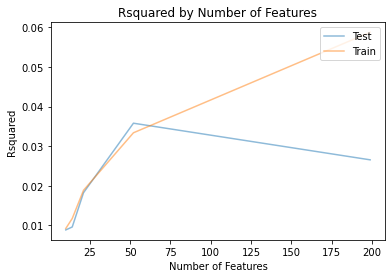

In [154]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [155]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
19,HomeRemote_All or almost all the time (I'm ful...,0.158436,0.158436
42,YearsCodedJob_Less than a year,0.131968,0.131968
2,Professional_Professional non-developer who so...,-0.126591,0.126591
30,CompanyType_Publicly-traded corporation,-0.122264,0.122264
48,Overpaid_Somewhat underpaid,-0.117728,0.117728
28,CompanyType_I don't know,-0.113677,0.113677
9,Country_United States,0.105655,0.105655
27,CompanySize_Fewer than 10 employees,0.096292,0.096292
44,JobSecurity_Strongly agree,0.087049,0.087049
29,"CompanyType_Privately-held limited company, no...",-0.084854,0.084854


In [156]:
coef_df.head(5)

,est_int,coefs,abs_coefs
19,HomeRemote_All or almost all the time (I'm ful...,0.158436,0.158436
42,YearsCodedJob_Less than a year,0.131968,0.131968
2,Professional_Professional non-developer who so...,-0.126591,0.126591
30,CompanyType_Publicly-traded corporation,-0.122264,0.122264
48,Overpaid_Somewhat underpaid,-0.117728,0.117728


In [157]:
coef_df.tail(5)

,est_int,coefs,abs_coefs
45,Currency_Euros (€),-8.095821e-03,8.095821e-03
4,"ProgramHobby_Yes, I program as a hobby",-6.424296e-03,6.424296e-03
0,HoursPerWeek,6.142803e-03,6.142803e-03
23,"CompanySize_10,000 or more employees",8.014998e-04,8.014998e-04
1,Salary,2.377100e-07,2.377100e-07


### Results

### Q2: Is salary a important part for the happy programmers?
happy programmers: okay with the job and career, with 6 and above 


features:
    quantitative features:  'Salary', 'ExpectedSalary' 'HoursPerWeek'
    categorical features: 'Country' CompanySize'
